# Desafio Final - IGTI - Analista de Machine Learning
### Neste desafio, para retomar o aprendizado adquirido durante todo o curso, serão praticados: Pré-processamento dos dados, Detecção de anomalias, Processamento dos dados, Correlação, Redução de dimencionalidade e Algoritmos supervisionados e não supervisionados

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cars = pd.read_csv('cars.csv')

In [4]:
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


### Questão 1: Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar:
Não foram encontrados valores nulos após a leitura dos dados

In [6]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

### Questão 2: Realize a transformação das colunas "cubicinches" e "weightlbs" do tipo "string" para o tipo numérico utilizando o pd.to_numeric(), com o parâmetro errors='coerce'. Após essa transformação é CORRETO afirmar:
Essa transformação adiciona valores nulos ao nosso dataset

In [7]:
cars['cubicinches'] = pd.to_numeric(cars['cubicinches'], errors='coerce')

In [8]:
cars['weightlbs'] = pd.to_numeric(cars['weightlbs'], errors='coerce')

In [9]:
cars.isnull().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

### Questão 3: Indique quais eram os índices dos valores presentes no dataset que "forçaram" o pandas a compreender a variável "cubicinches" como string.
40 e 180

In [10]:
cars[cars['cubicinches'].isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


### Questão 4: Após a transformação das variáveis "string" para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?
5

### Questão 5: Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna "weightlbs"?
3009,83

In [11]:
cars['cubicinches'].fillna(cars['cubicinches'].mean(), inplace=True)

In [12]:
cars['weightlbs'].fillna(cars['weightlbs'].mean(), inplace=True)

In [13]:
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


### Questão 6: Após substituir os valores nulos pela média das colunas, selecione as colunas 'mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year'. Qual é o valor da mediana para a característica 'mpg'?
22,0

In [14]:
cars.mpg.median()

22.0

### Questão 7: Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável "time-to-60"?
75% dos dados são maiores que o valor de 14,00

In [15]:
cars. describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


### Questão 8: Sobre o coeficiente de correlação de Pearson, entre as variáveis "cylinders" e "mpg", é correto afirmar, EXCETO:
* Mesmo não sendo igual a 1, é possível dizer que à medida que a variável "cylinders" aumenta, a variável "mpg" também aumenta em uma mesma direção.

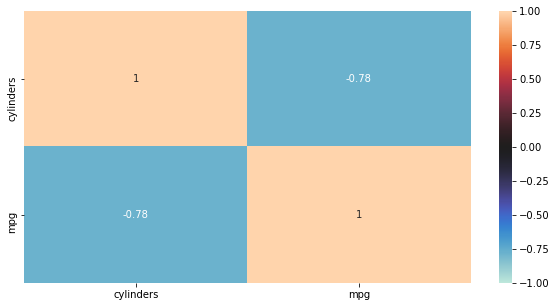

In [16]:
import seaborn as sn
plt.figure(figsize=(10, 5))
matriz_de_correlação = cars[['cylinders', 'mpg']].corr()
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)
plt.show()

### Questão 9: Sobre o bloxplot da variável "hp", é correto afirmar, EXCETO:
Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro

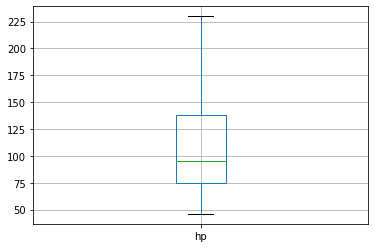

In [17]:
cars.boxplot(['hp'])

### Questão 10: Após normalizado com a função StandardScaler(), qual é o maior valor para a variável "hp"?
3,05

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = cars.columns[cars.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
cars_scaler = cars[num_cols]
cars_scaler[num_cols] = scaler.fit_transform(cars_scaler[num_cols])
cars_scaler.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [40]:
cars_scaler['hp'].max()

3.05870398977614

### Questão 11: Aplicando o PCA conforme a definição acima, qual é o valor da variância explicada pela primeira componente principal?
72%

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca_cars = pca.fit_transform(cars_scaler)

In [55]:
pca_cars[0].var()

1.447767105184141

### Questão 12: Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é correto afirmar:
* Existem 3 centroides após a aplicação da clusterização
* Cada um dos clusters possui características próprias
* Os centroides, utilizando apenas as 3 componentes principais, possuem 3 dimensões

In [56]:
from sklearn.cluster import KMeans

In [69]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(cars_scaler.iloc[:,:3])
X_clustered = kmeans.predict(cars_scaler.iloc[:,:3])
centers = np.array(kmeans.cluster_centers_)

### Questão 13: Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão ("mpg" > 25) devem ser considerados eficientes. Utilize as colunas 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to'60' como as entradas e como saída a coluna de eficiência criada. Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?
Aproximadamente 0,87

In [90]:
cars_models = cars
cars_models['new_mpg'] = np.where(cars['mpg'] > 25, 1, 0)
cars_models.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,new_mpg
0,14.0,8,350.0,165,4209.0,12,1972,US.,0
1,31.9,4,89.0,71,1925.0,14,1980,Europe.,1
2,17.0,8,302.0,140,3449.0,11,1971,US.,0
3,15.0,8,400.0,150,3761.0,10,1971,US.,0
4,30.5,4,98.0,63,2051.0,17,1978,US.,1


In [93]:
y = cars_models['new_mpg']
X = cars_models[['cylinders','cubicinches','hp','weightlbs','time-to-60']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=42)
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(182, 5) (182,) (79, 5) (79,)


In [100]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
score = modelDT.score(X_valid, y_valid)
print(score)

0.8734177215189873


### Questão 14: Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é correto afirmar:
* Os falso-positivos correspondem a instâncias em que o algoritmo considerou a previsão como verdadeira e, na realidade, era falsa.
* A matriz de confusão se constitui em uma estratégia ainda mais importante quando um dataset não está balanceado
* A diagonal principal da matriz mostra as instâncias em que as previsões foram corretas

In [136]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
previsoes = model_dt.predict(X_valid)

from sklearn.metrics import r2_score, classification_report, confusion_matrix
report = classification_report(y_valid, previsoes)

print(report)

precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



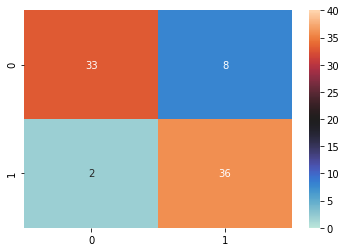

In [135]:
matrix = confusion_matrix(y_valid, previsoes)
sn.heatmap(matrix, annot=True,vmin=0, vmax=40,center= 20)
plt.show()

### Questão 15: Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho. Comparando os resultados obtidos com o modelo de árvore de decisão, é CORRETO afirmar:
* A acurácia de ambos os modelos foi superior a 80%
* Como os dois modelos obtiveram um resultado superior a 80% de acurácia, a escolha sobre qual utilizar deve e pode ser feita a partir de outros critérios, como a complexidade do modelo.
* A árvore de decisão e a regressão logística podem ser utilizadas para previsão em regressões

In [105]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=42).fit(X_train, y_train)
score = modelLR.score(X_valid, y_valid)
print(score)

0.8607594936708861


### 